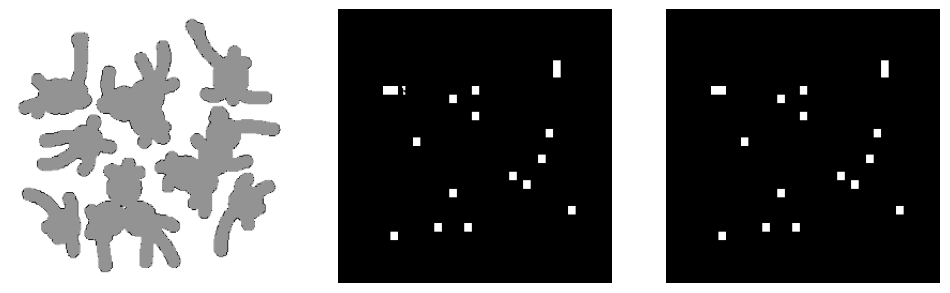

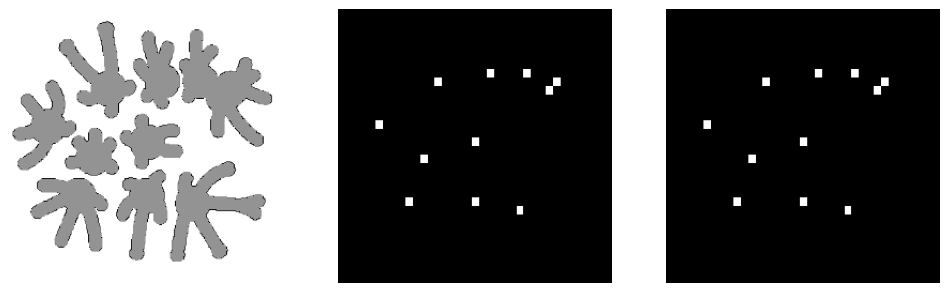

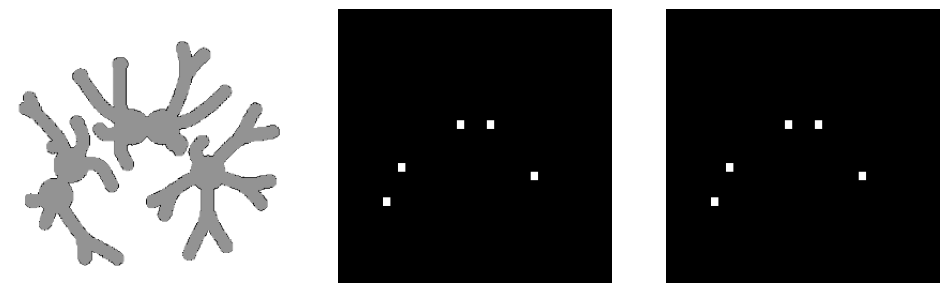

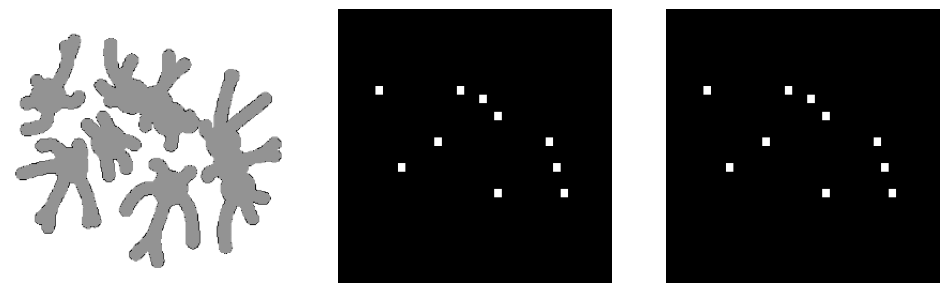

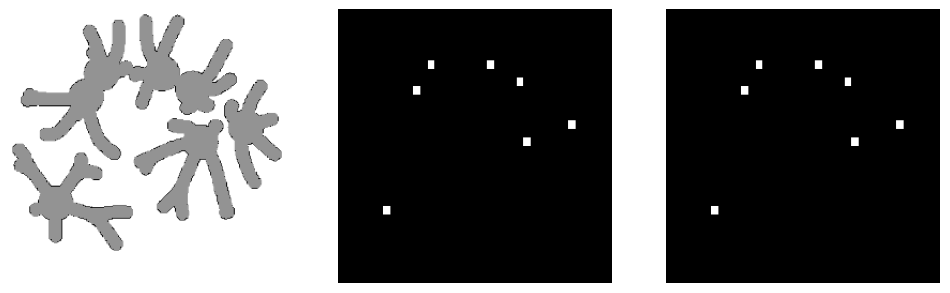

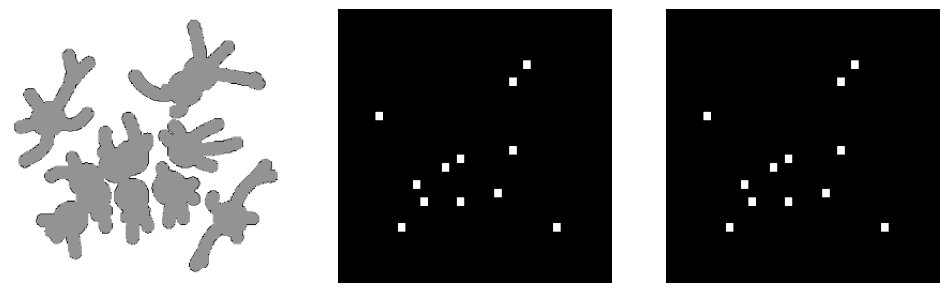

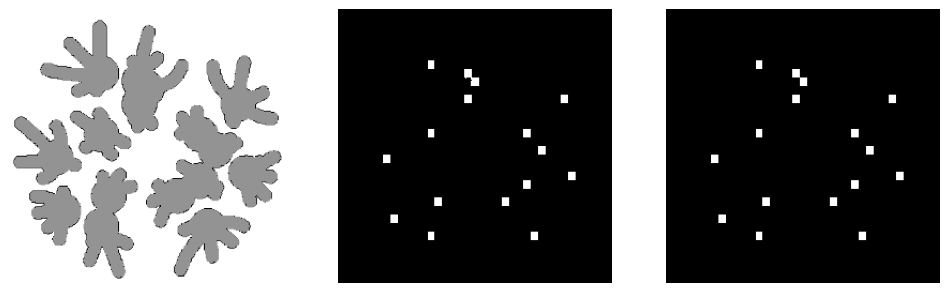

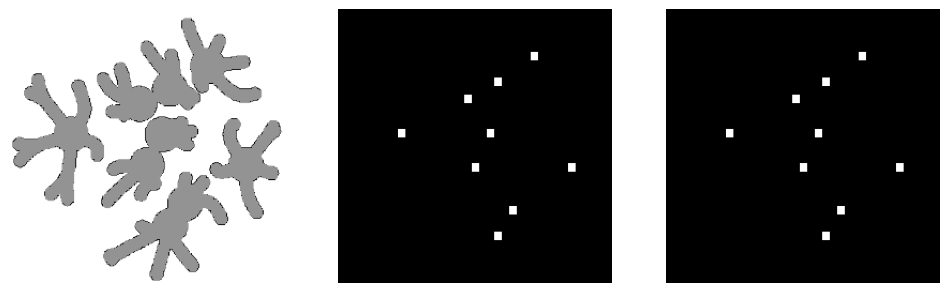

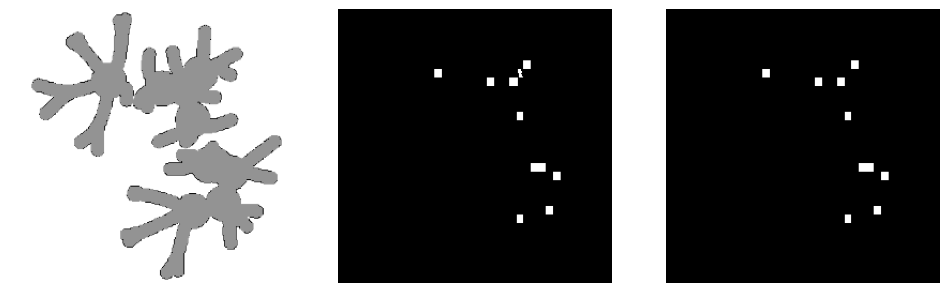

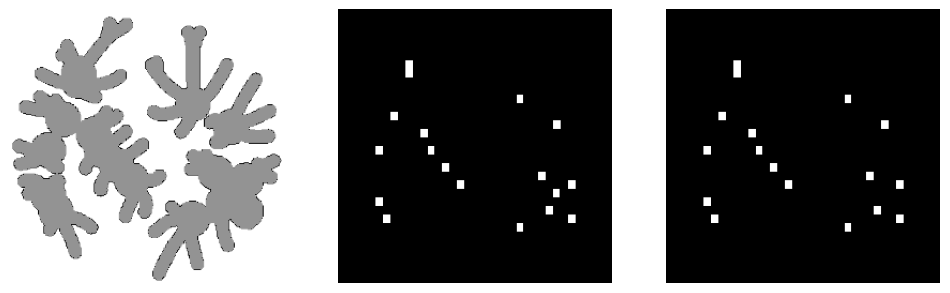

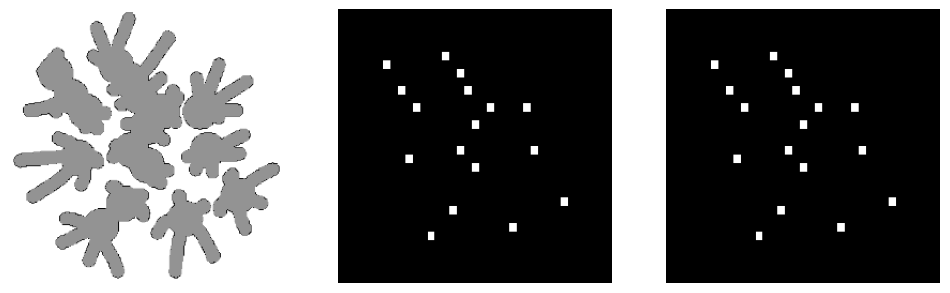

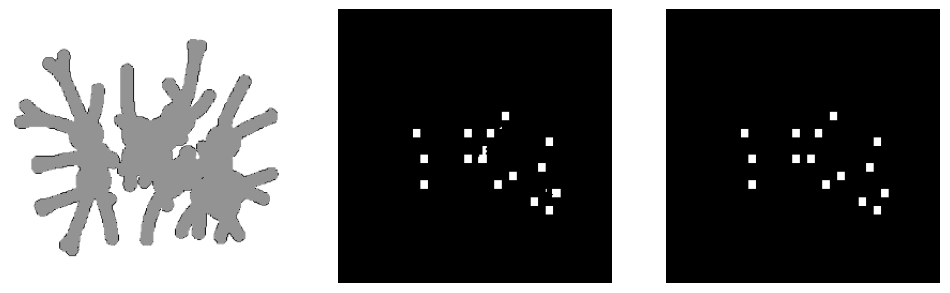

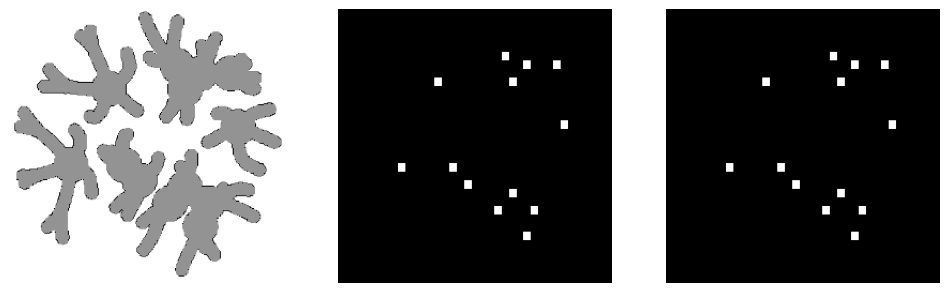

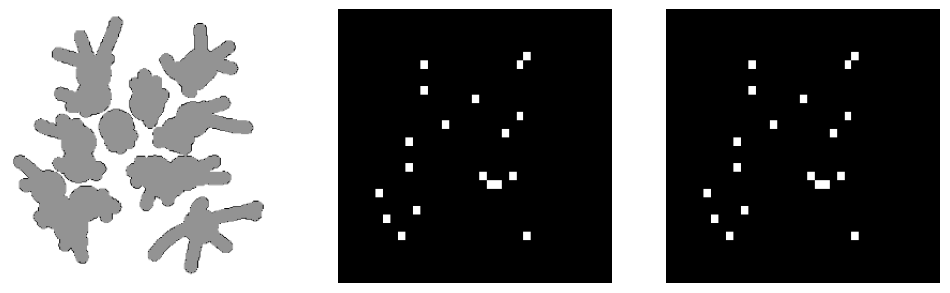

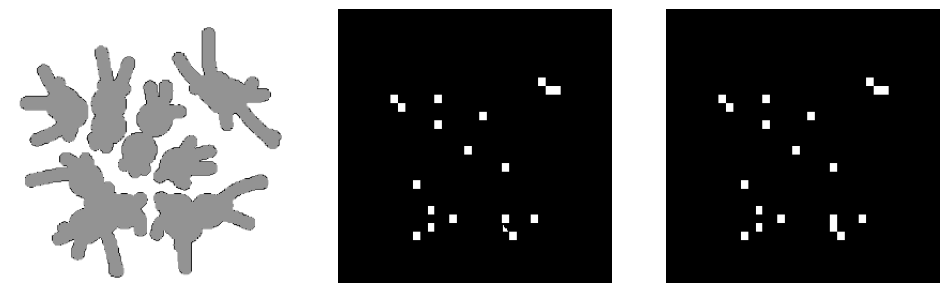

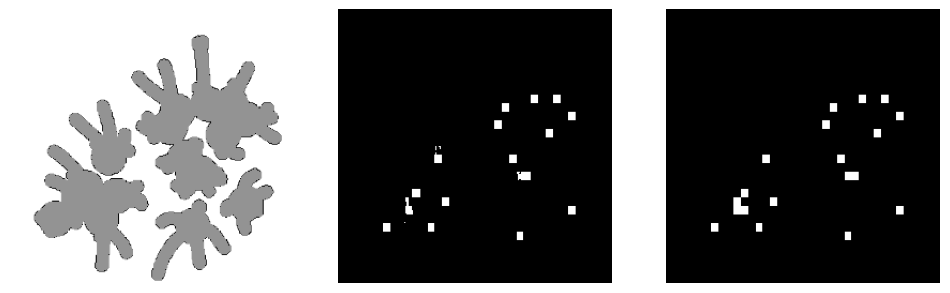

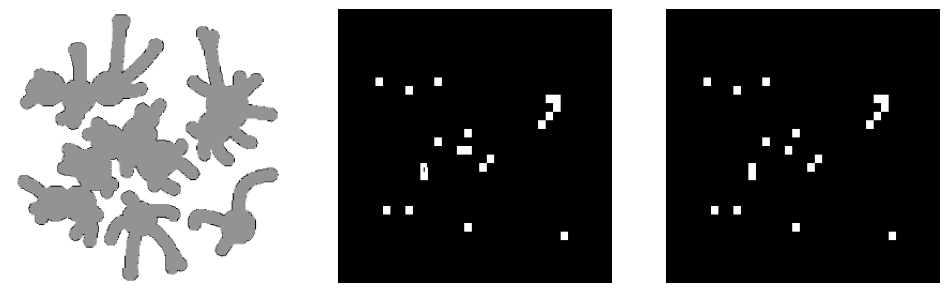

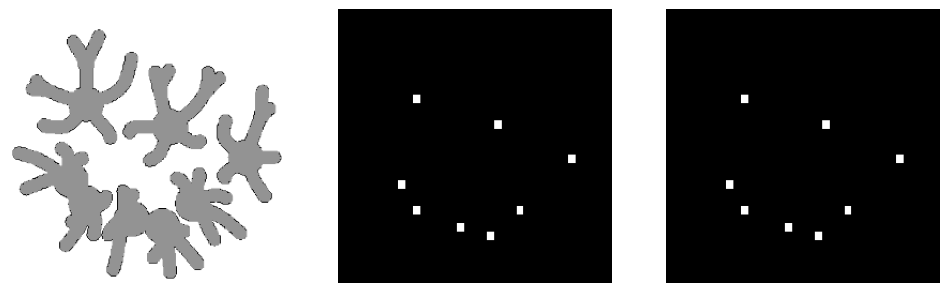

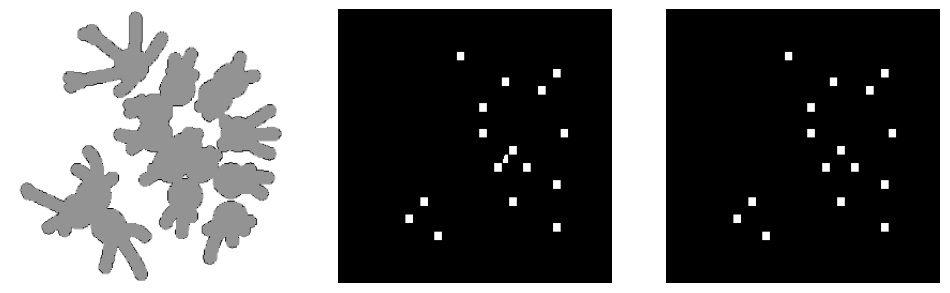

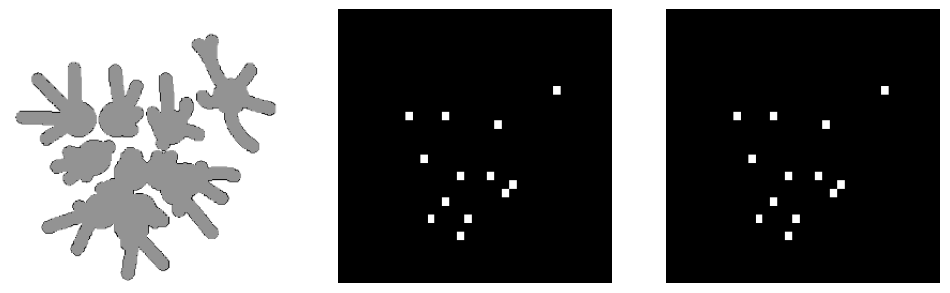

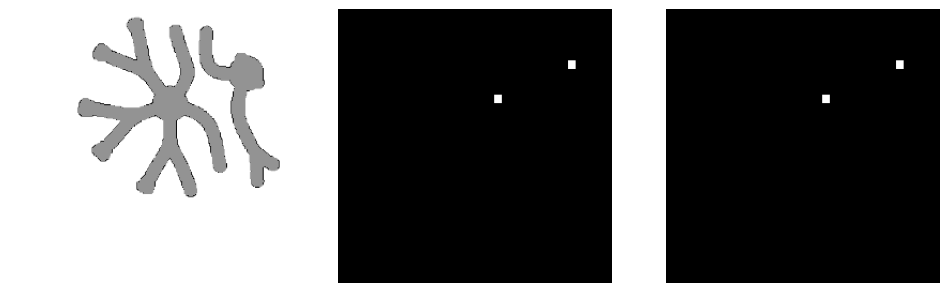

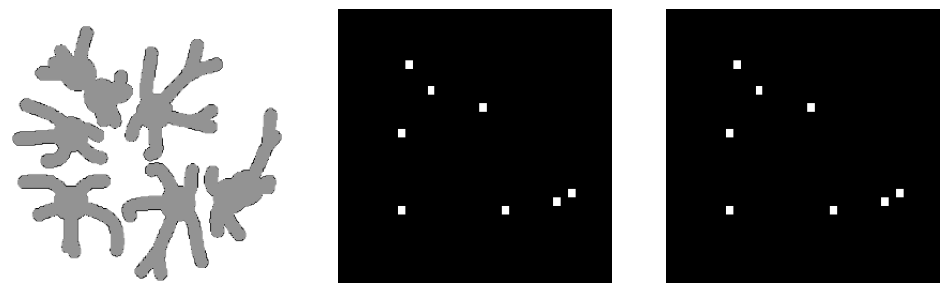

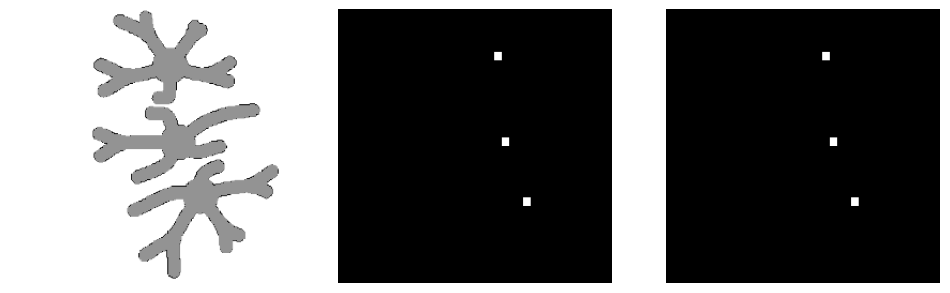

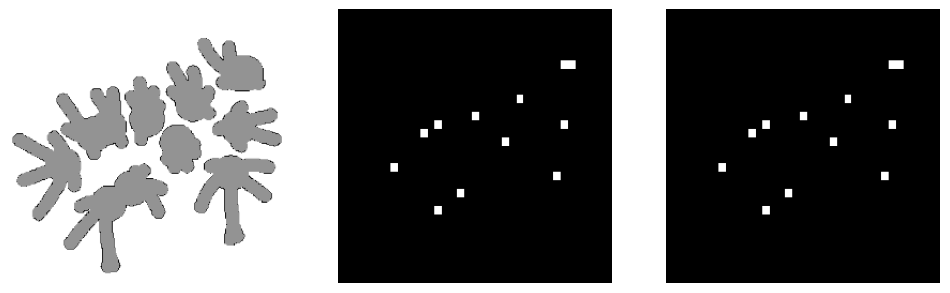

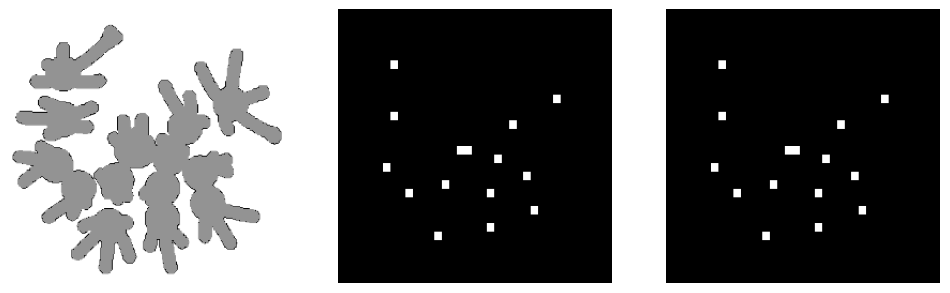

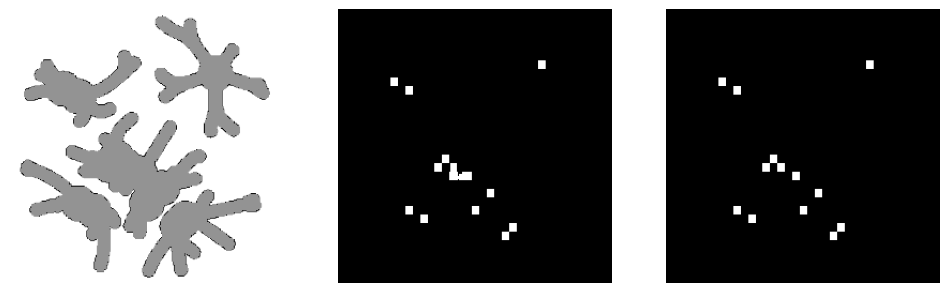

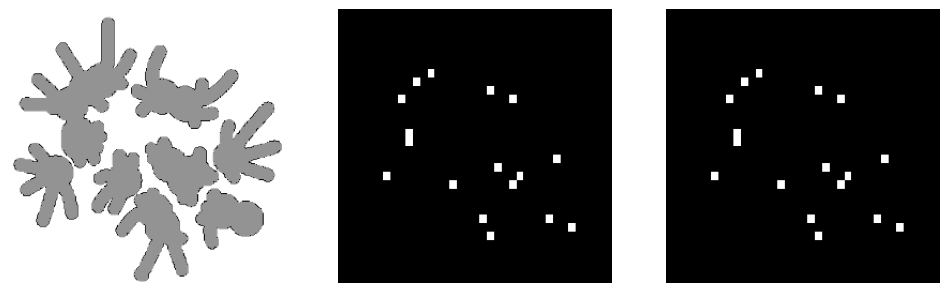

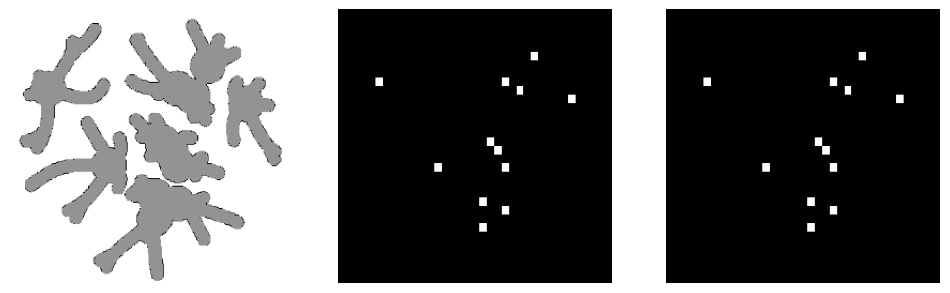

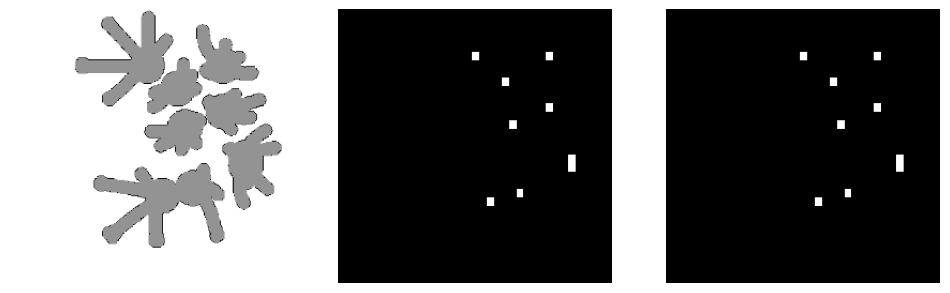

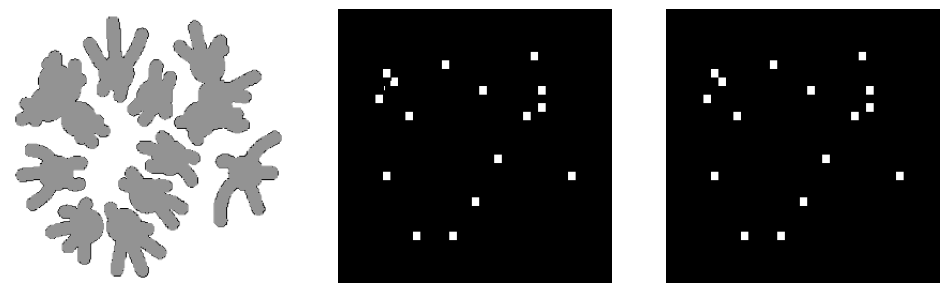

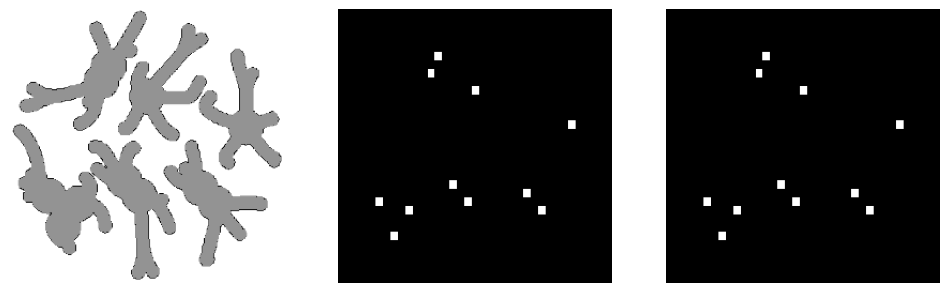

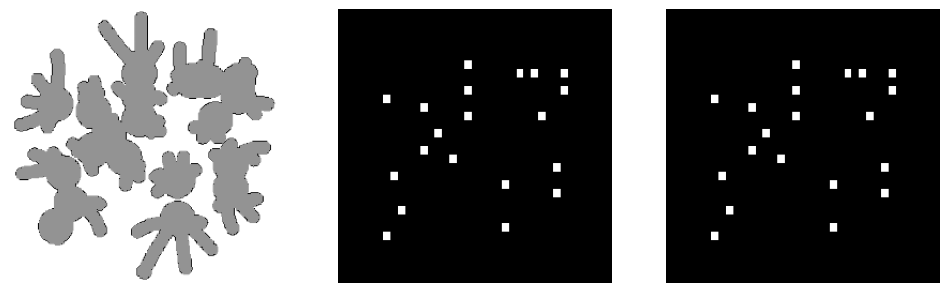

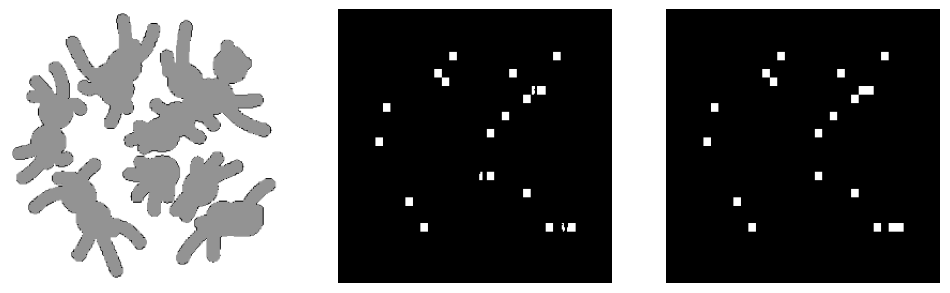

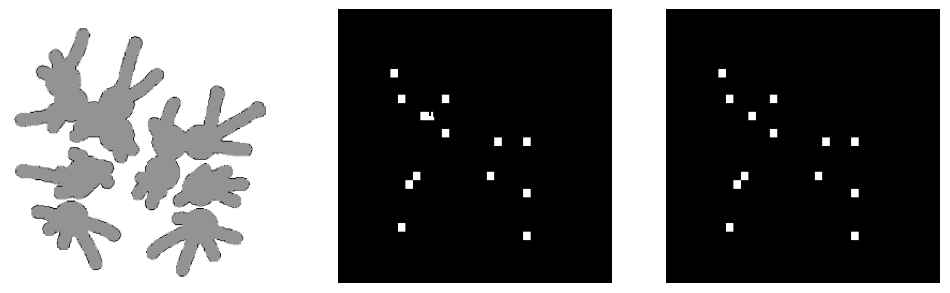

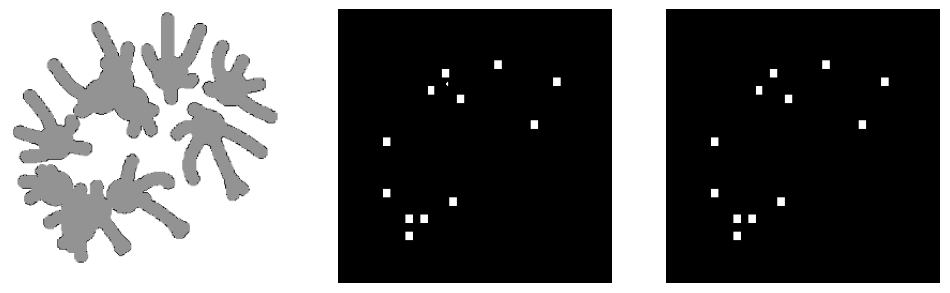

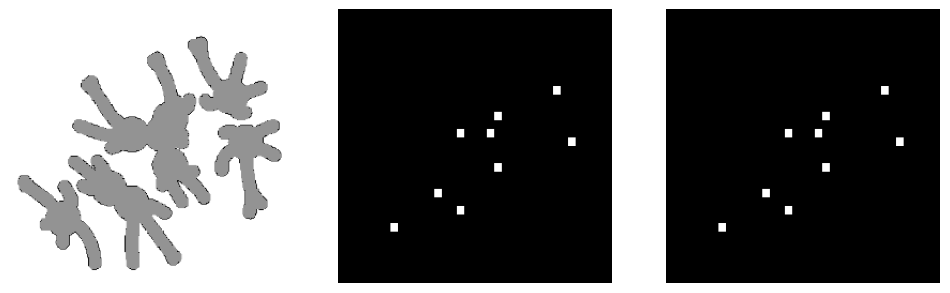

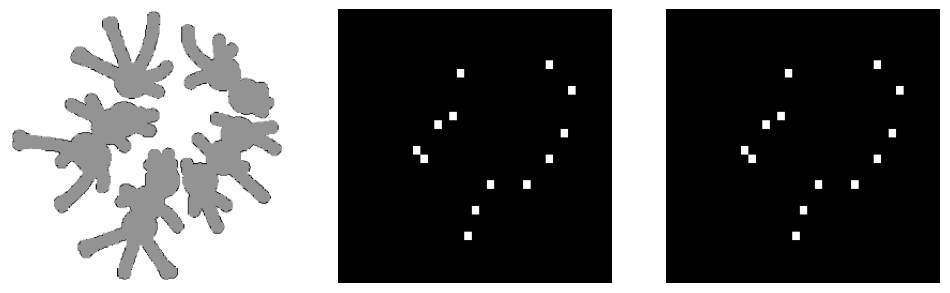

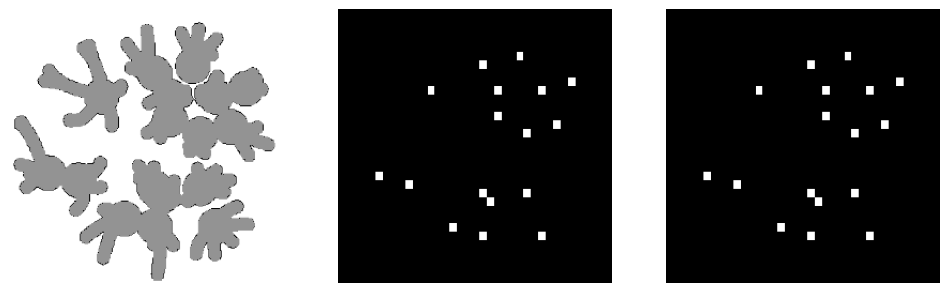

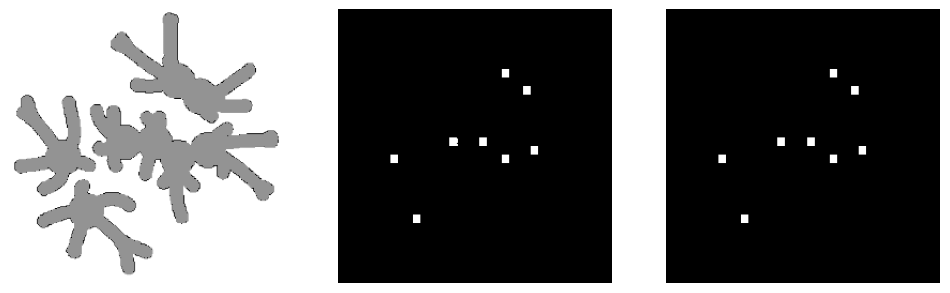

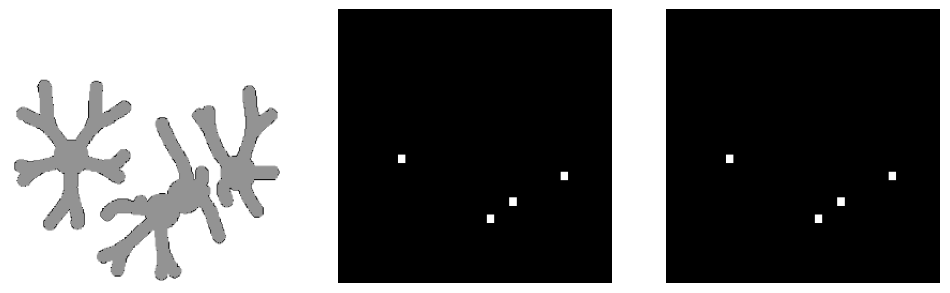

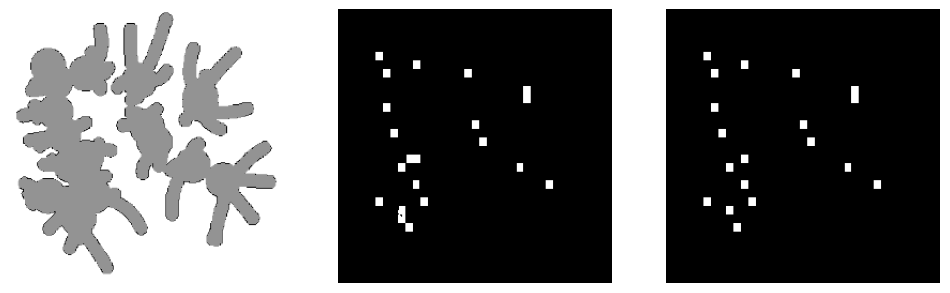

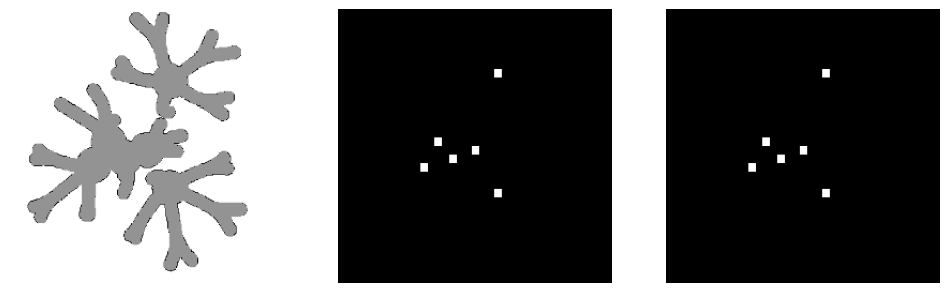

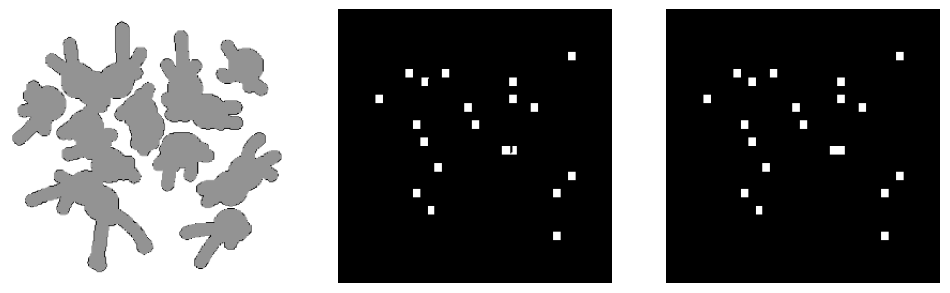

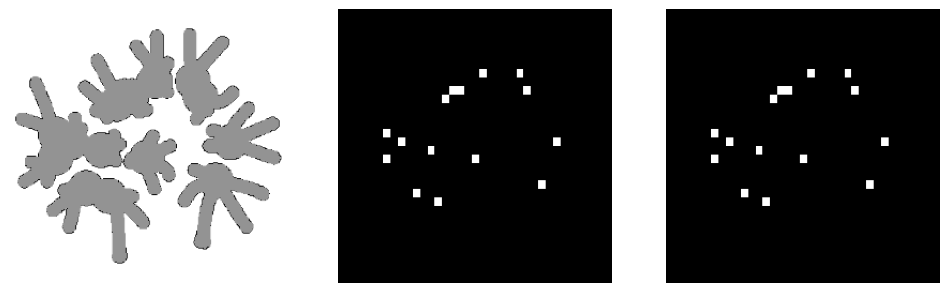

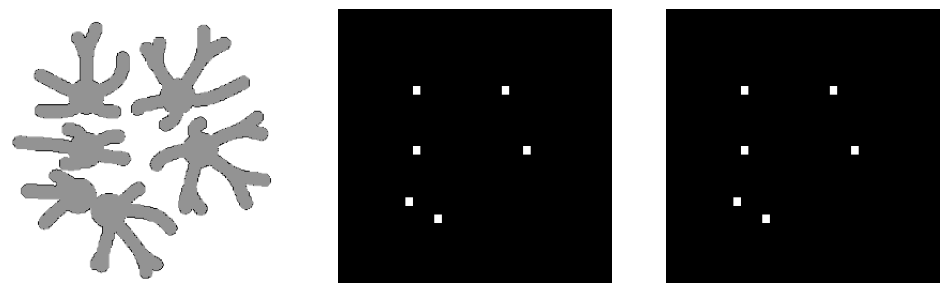

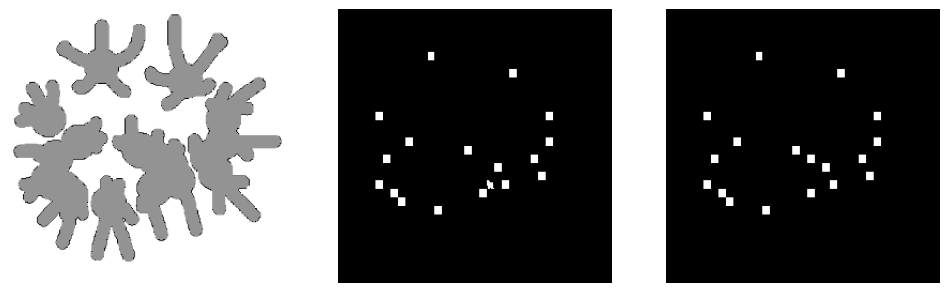

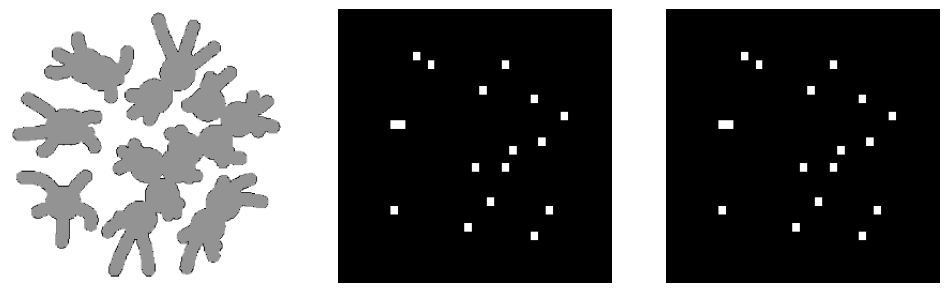

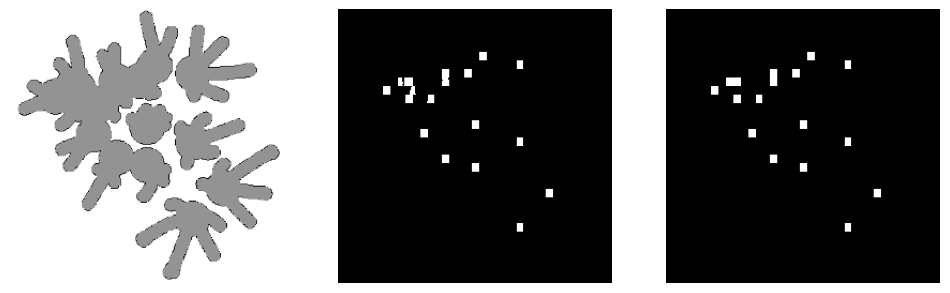

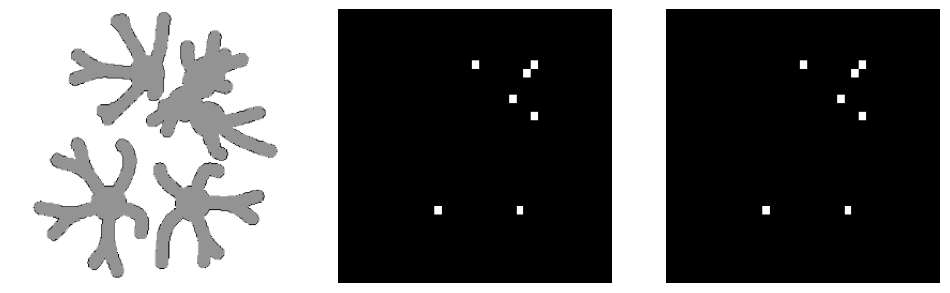

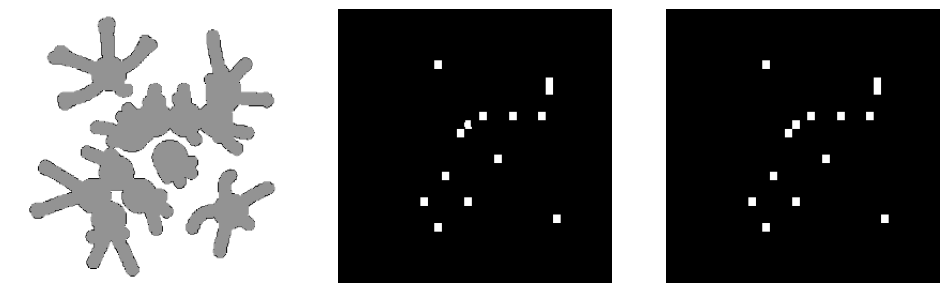

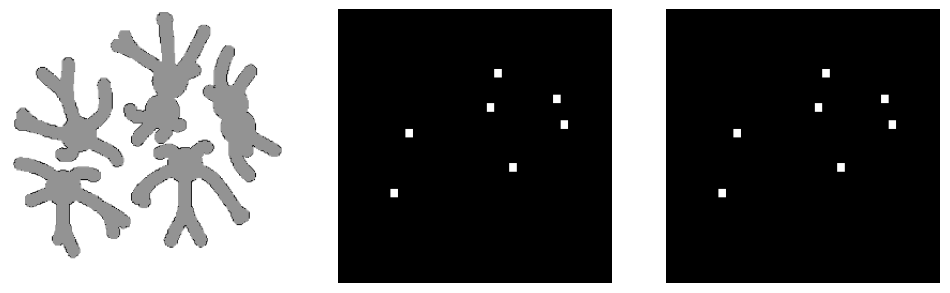

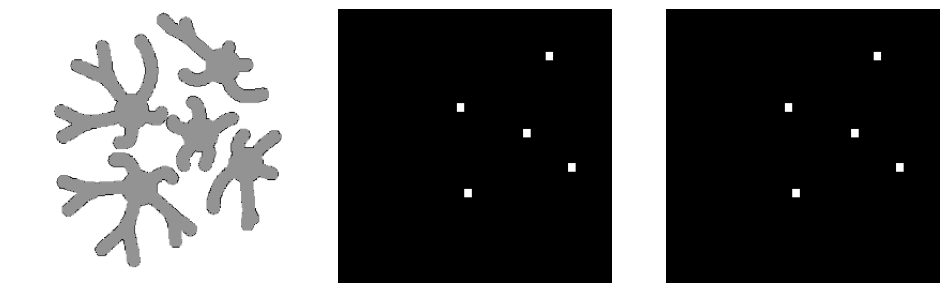

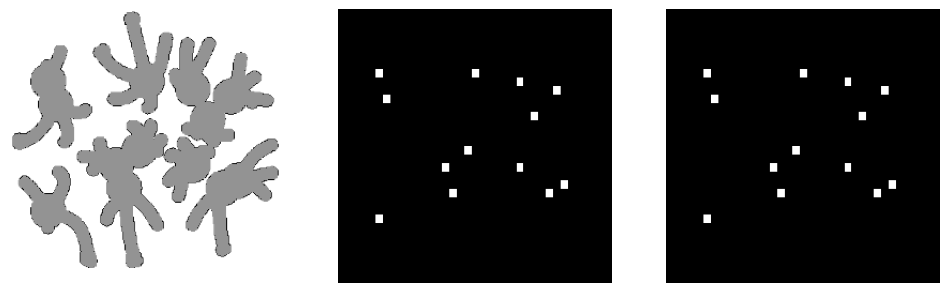

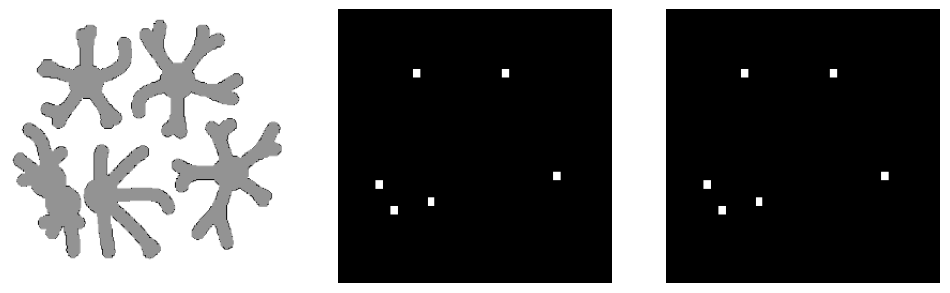

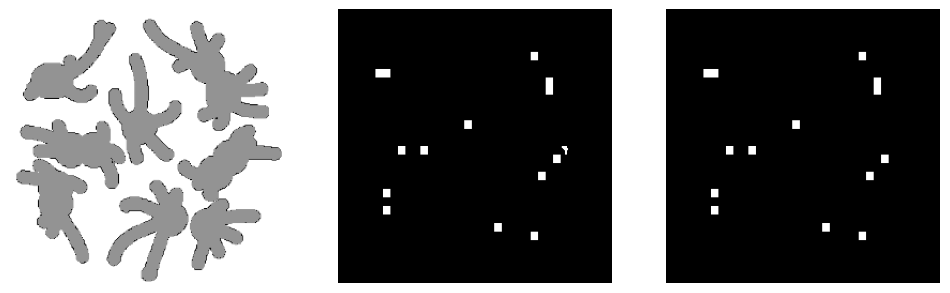

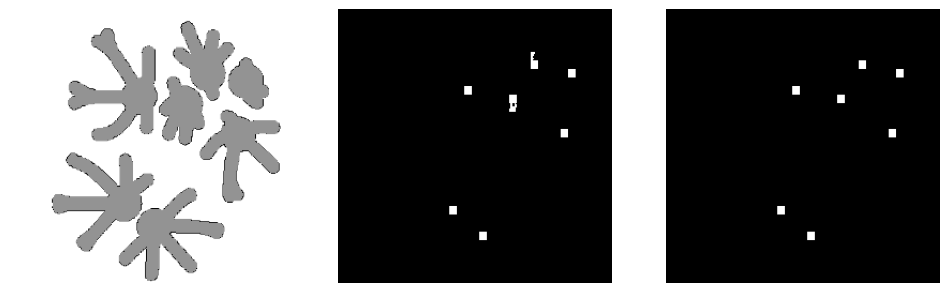

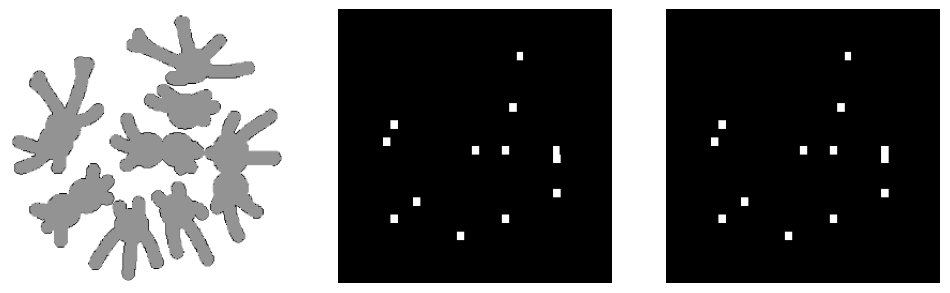

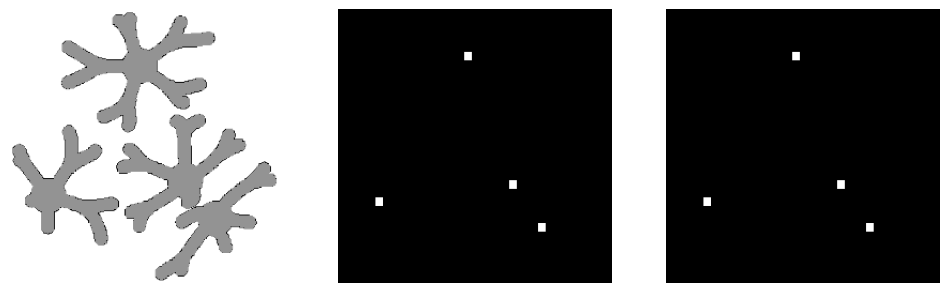

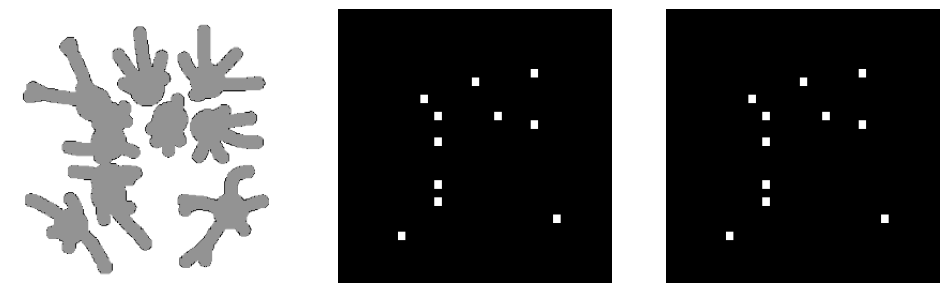

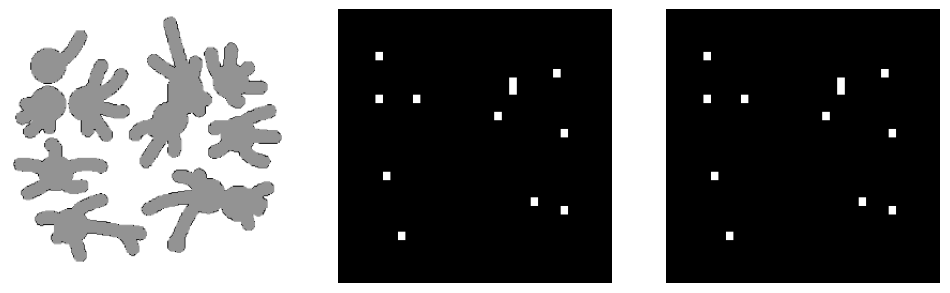

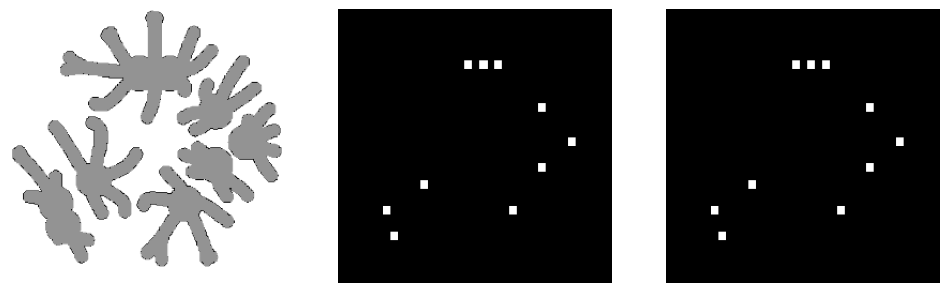

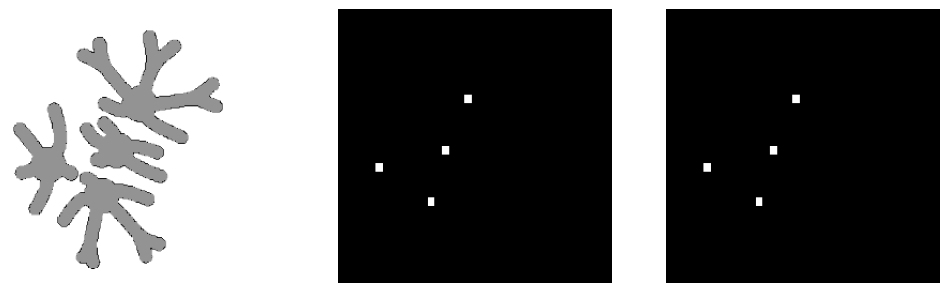

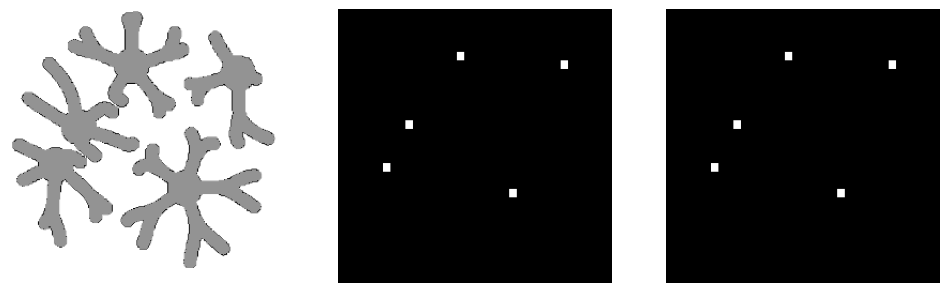

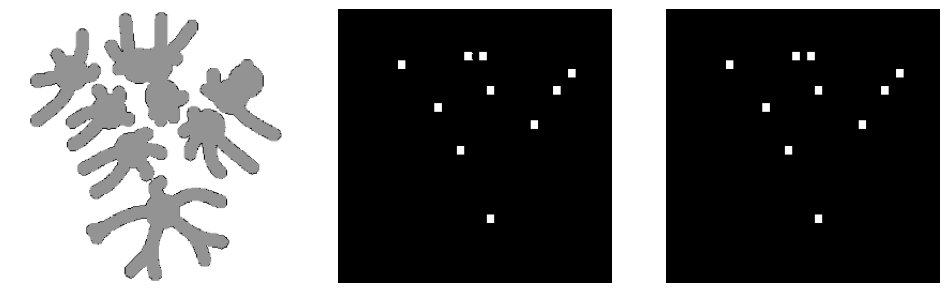

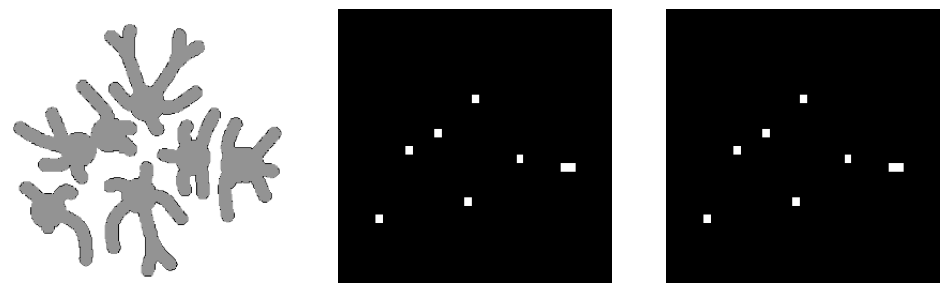

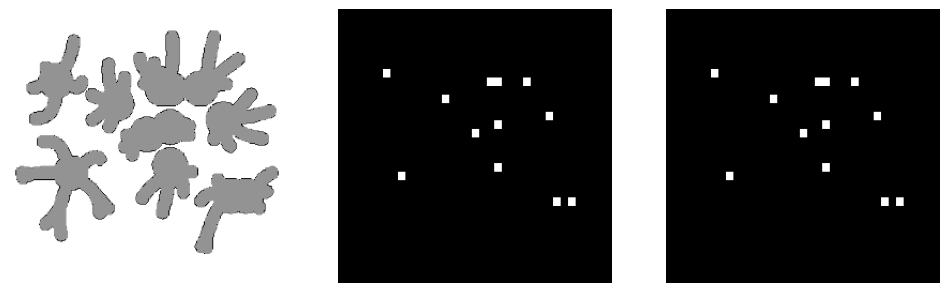

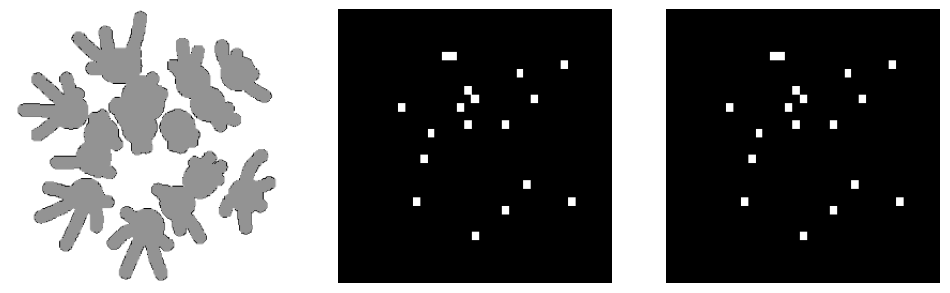

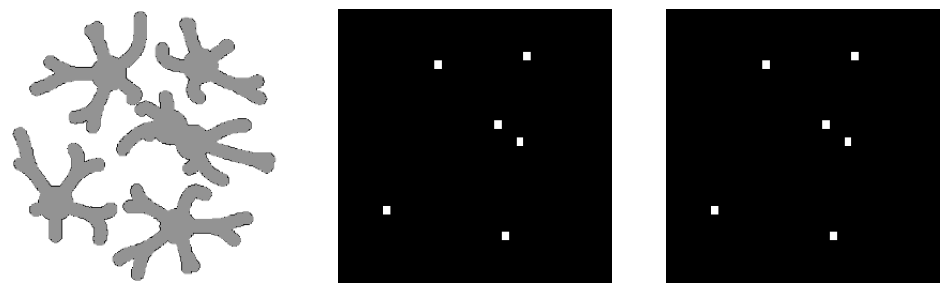

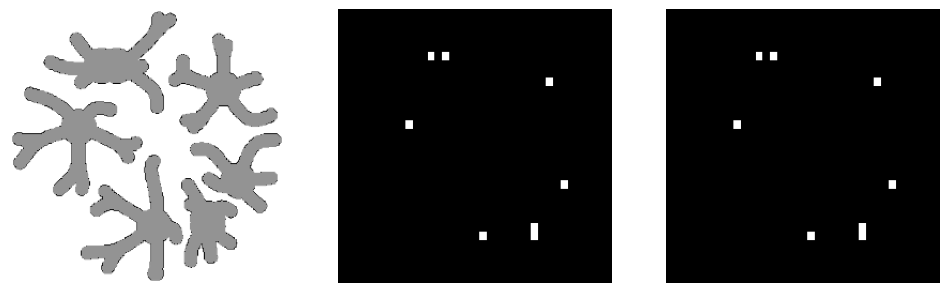

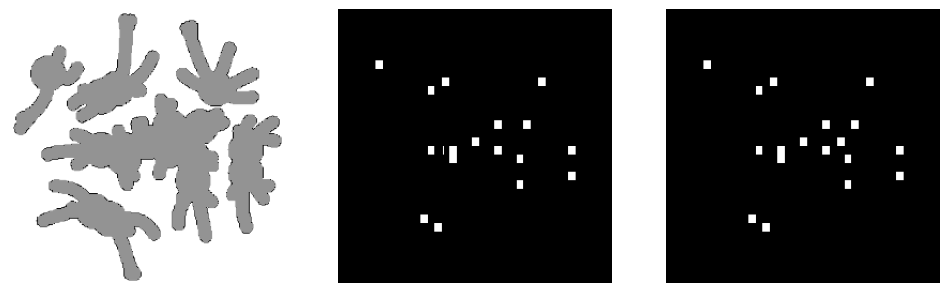

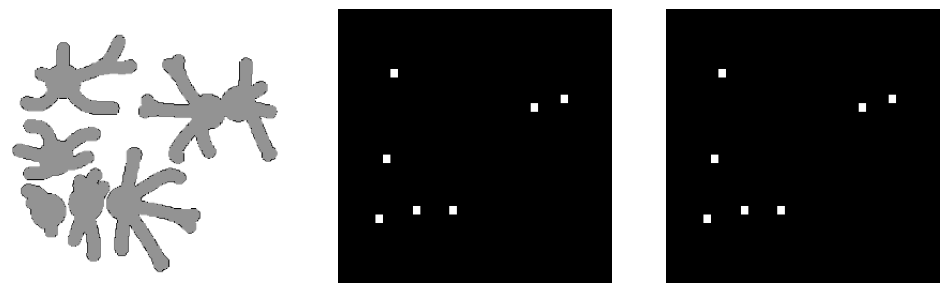

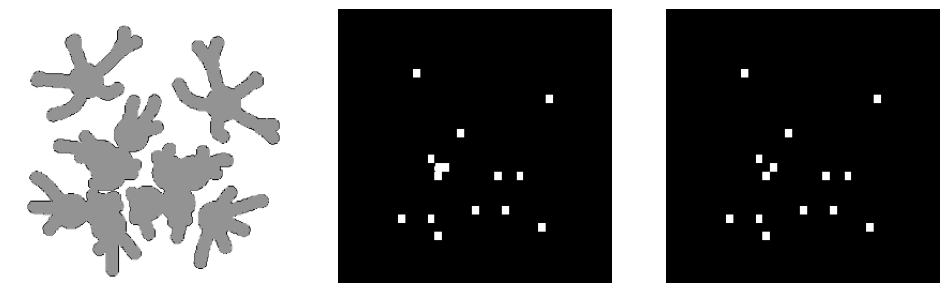

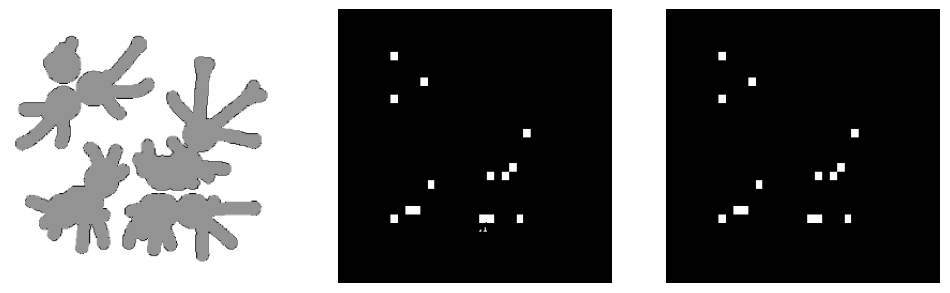

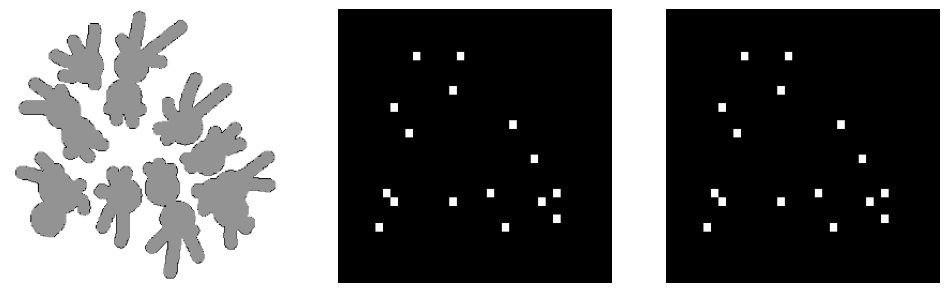

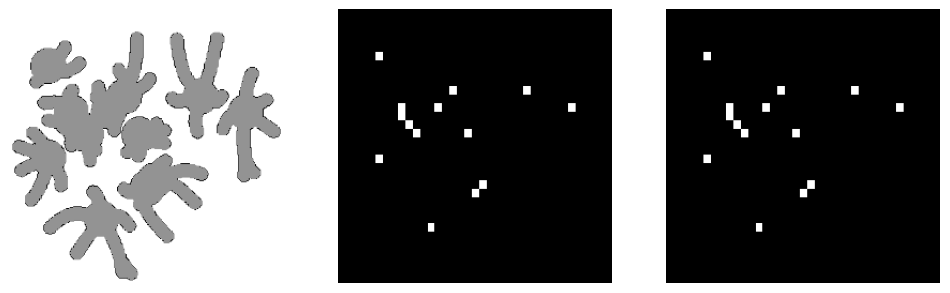

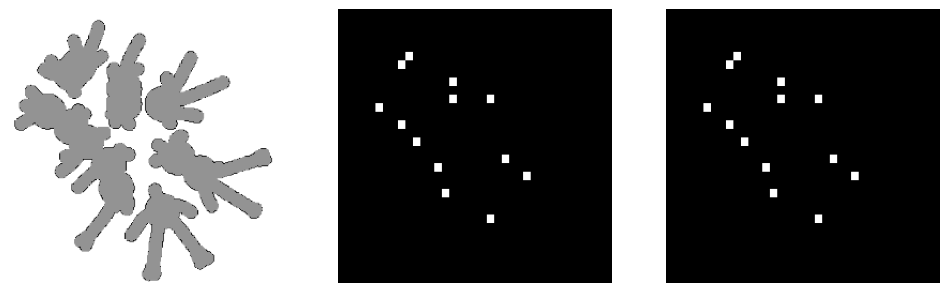

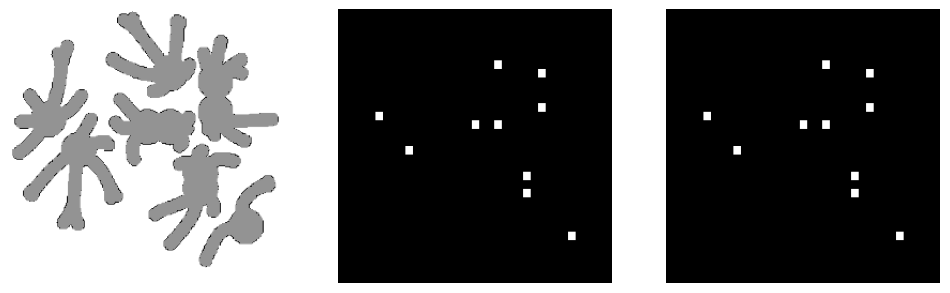

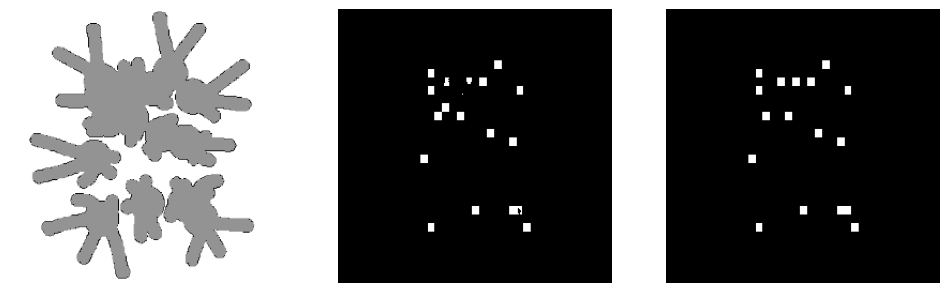

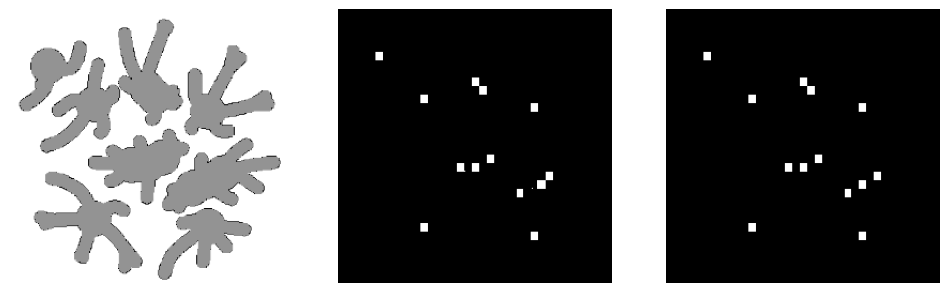

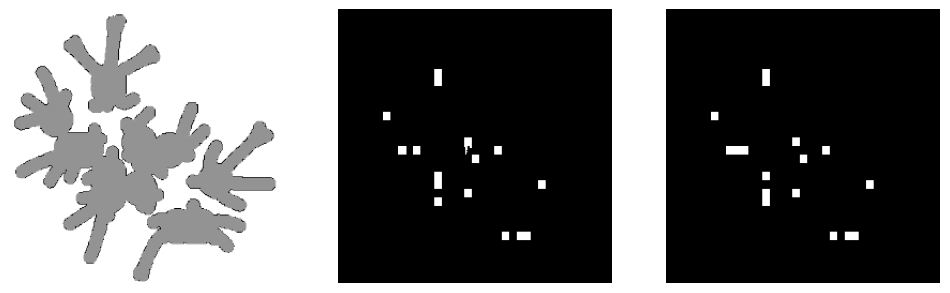

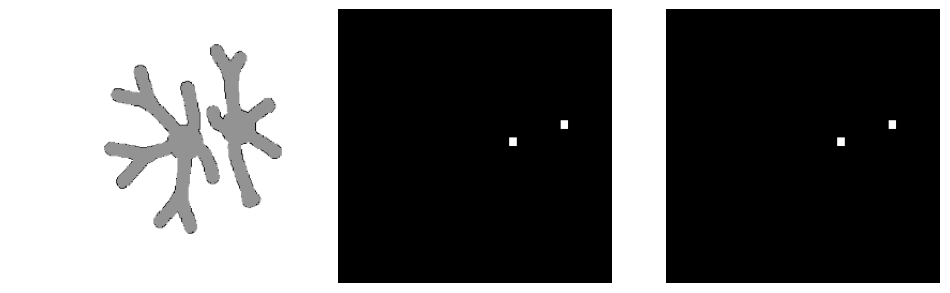

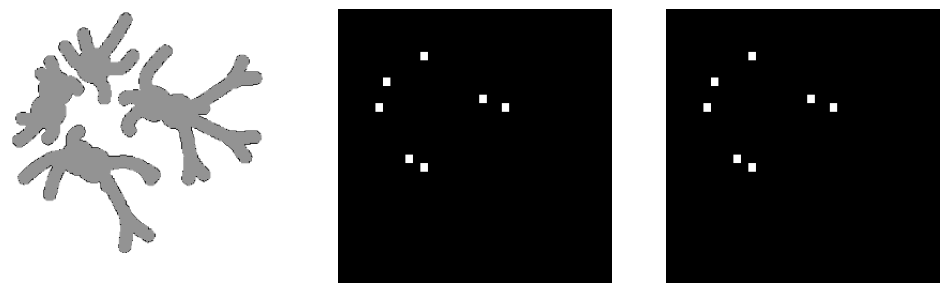

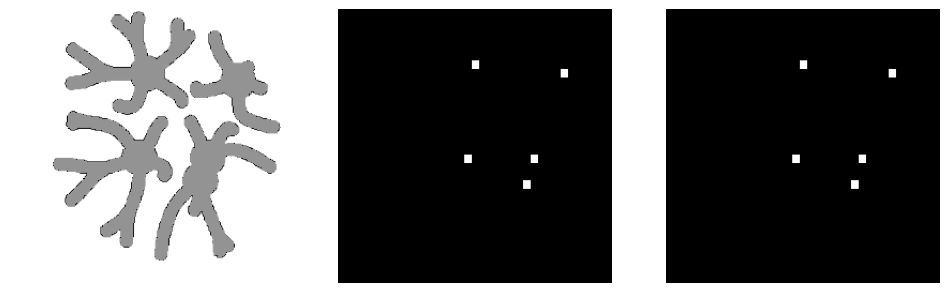

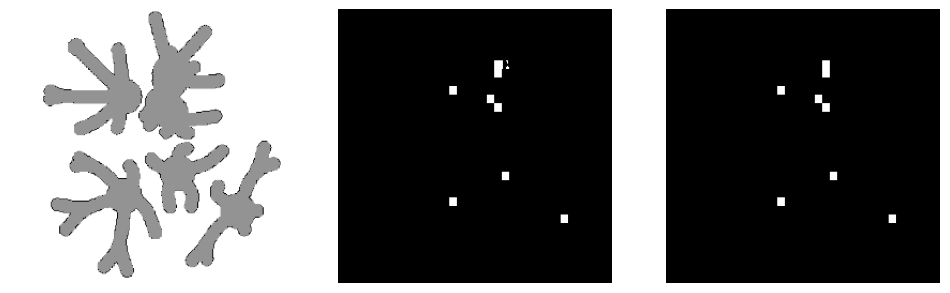

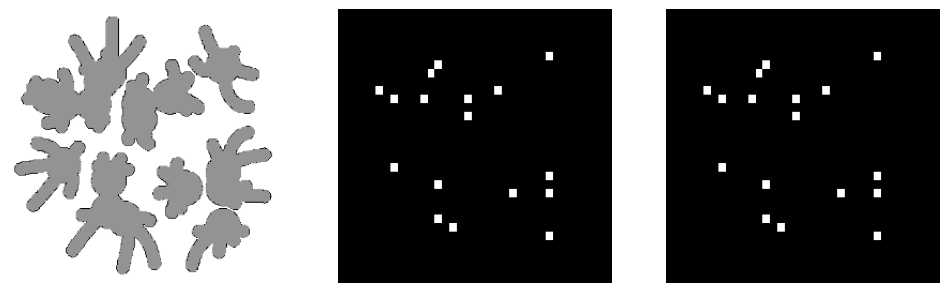

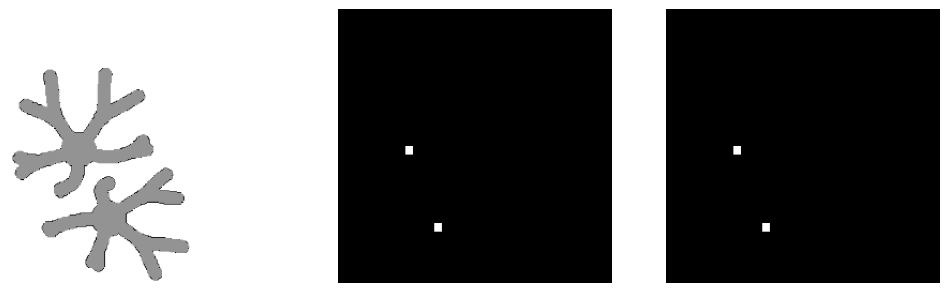

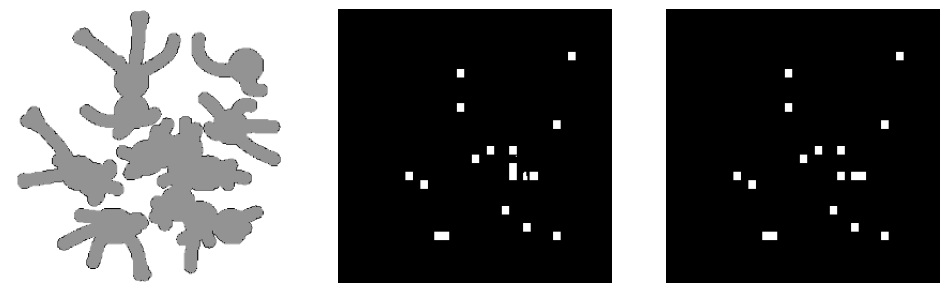

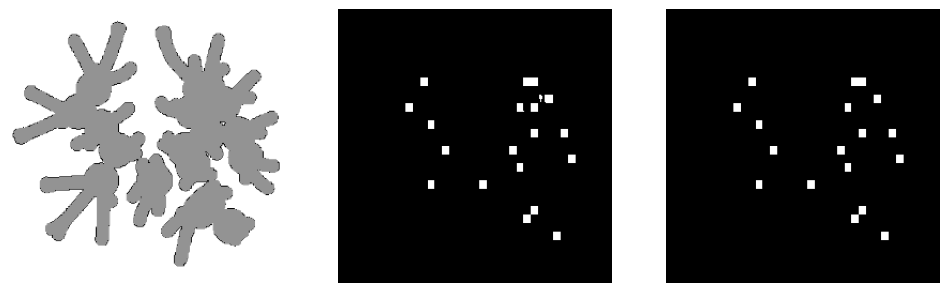

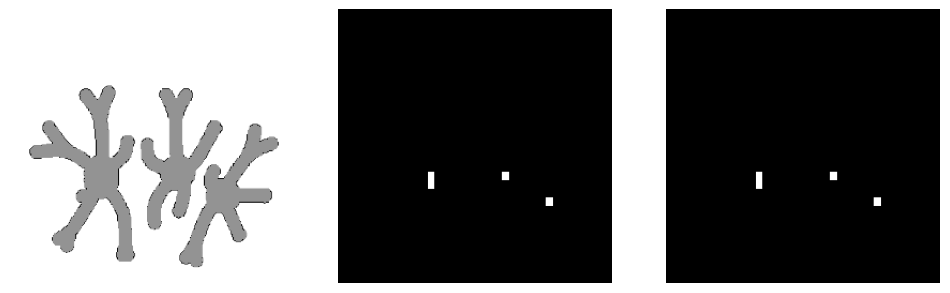

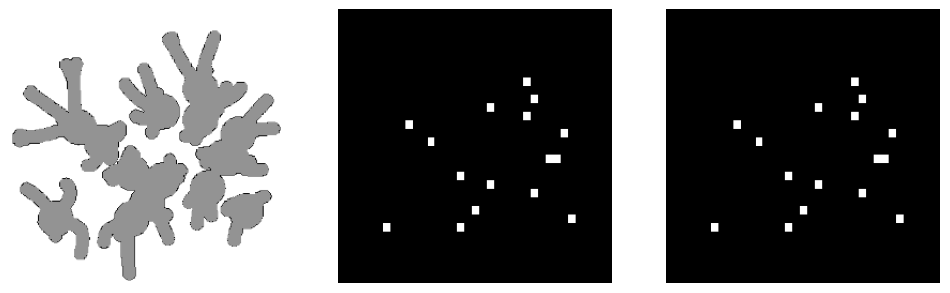

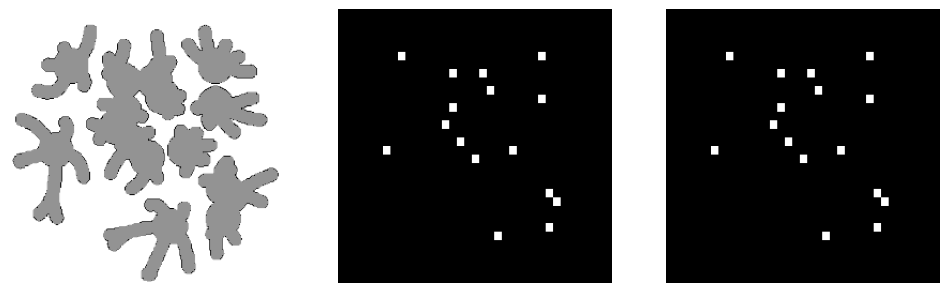

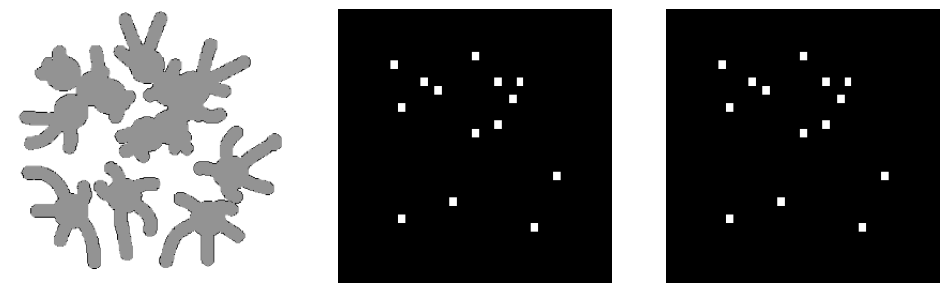

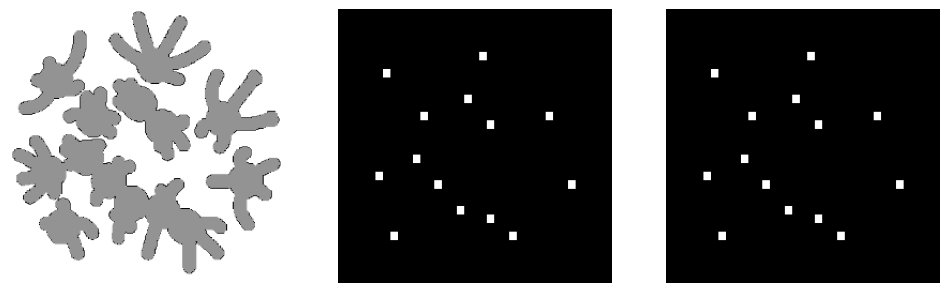

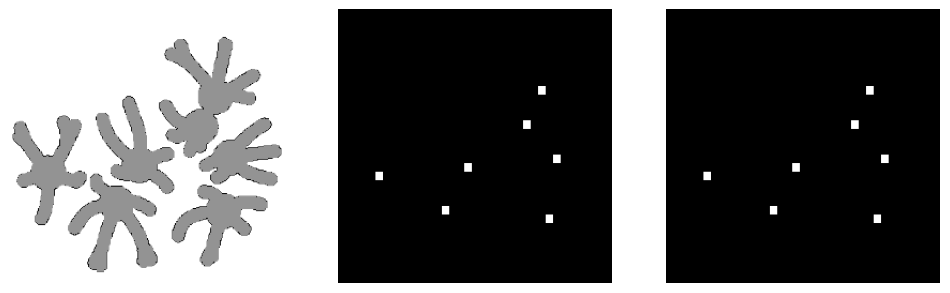

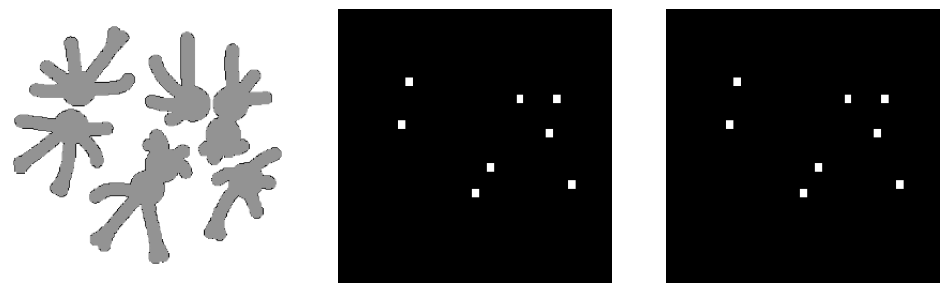

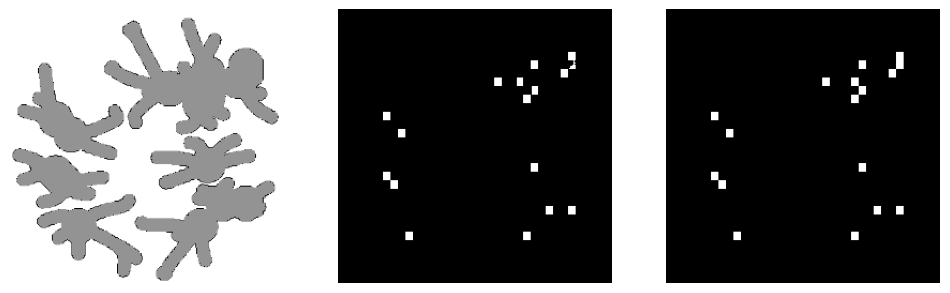

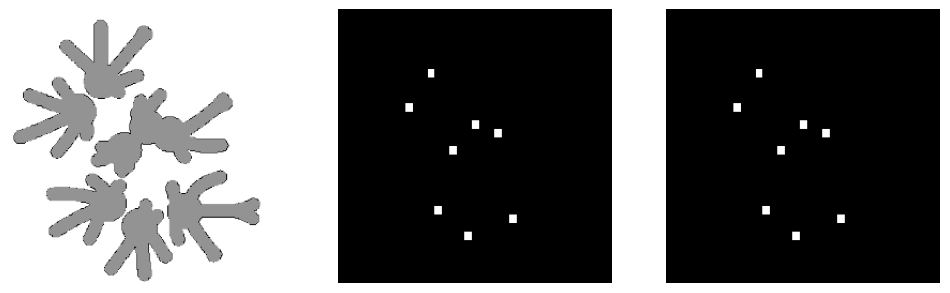

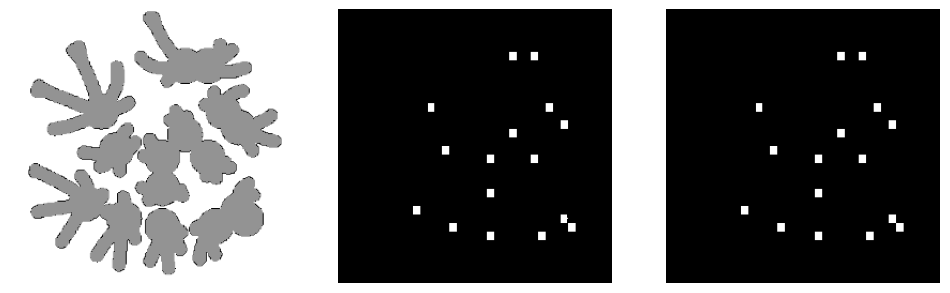

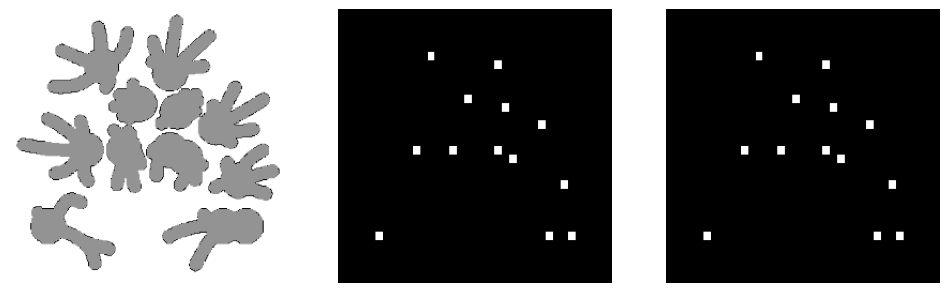

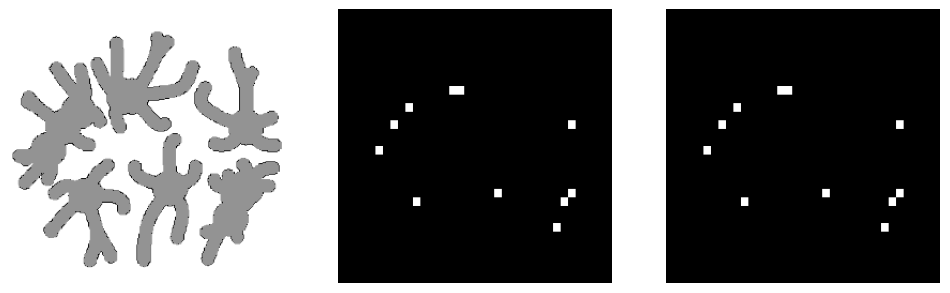

In [1]:
# load model inputs and targets(ground truths) from folders defined in config.py
import os 
from torch.utils.data import DataLoader

from utils.config import SIM_FOLDER_SEEDTOSIM, SEED_FOLDER_SEEDTOSIM, OUTPUT_DIR_SEEDTOSIM_SAVED

from simtoseed_dataset import MyDataset
import matplotlib.pyplot as plt
import numpy as np
import torch
import cv2

source_folder= SIM_FOLDER_SEEDTOSIM
target_folder= SEED_FOLDER_SEEDTOSIM

prediction_folder= OUTPUT_DIR_SEEDTOSIM_SAVED

dataset= MyDataset(start=50000, end=50100) # infer on 100 images not in training set, defined in simtoseed_infer.py

dataloader= DataLoader(dataset, batch_size=4, shuffle=False, num_workers=0)

for i, data in enumerate(dataloader):
    source= data['source']  # shape (B, 1, H, W)
    target= data['target']  # shape (B, 1, H, W)
    stem= data['stem']      # list of file stems in the batch
    
    # convert to numpy arrays, remove additional channel dimension and denormalize 
    source_np= source.numpy()[:,0,:,:] * 255.0
    target_np= target.numpy()[:,0,:,:] * 255.0

    for j in range (source_np.shape[0]):
        src_img= source_np[j,:,:].astype(np.uint8)
        tgt_img= target_np[j,:,:].astype(np.uint8)
        img_stem= stem[j]

        # load model predictions from inference folder
        pred_img=cv2.imread(os.path.join(prediction_folder, f"{img_stem}.png"), cv2.IMREAD_GRAYSCALE)  
        
        # plot comparisions side by side     
        fig, axs = plt.subplots(1, 3, figsize=(12, 4))
        axs[0].imshow(src_img, cmap='gray')
        axs[0].axis('off')
        axs[1].imshow(pred_img, cmap='gray')
        axs[1].axis('off')
        axs[2].imshow(tgt_img, cmap='gray')
        axs[2].axis('off')
        plt.show()